In [1]:
# 导入 pandas 库
import pandas as pd
# 导入 numpy 库
import numpy as np               
# 导入 matplotlib 库
import matplotlib.pyplot as plt
# 设置 Matplotlib 使用支持中文的字体（SimHei）
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 使用 pandas 读取tsv文件
Sig_Eqs = pd.read_csv("earthquakes-2025-10-30_15-11-32_+0800.tsv", sep='\t')
# 显示数据表的前 10 行
Sig_Eqs.head(10)

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,NaN,8.0,-1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,11.0,-1450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,9712.0,-1365.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
8,NaN,12.0,-1250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,13.0,-1050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 1.1
# 从地震数据表 Sig_Eqs 中选取 "Country" 和 "Deaths" 两列
deaths_by_country = (
    Sig_Eqs[['Country', 'Deaths']]
    # 按照 "Country" 分组
    .groupby('Country')
    # 对每个国家的死亡人数进行求和
    .sum()
    # 按照 "Deaths" 列进行降序排列
    .sort_values(by='Deaths', ascending=False)
    # 取前 10 行，得到死亡人数最多的前十个国家
    .head(10))
# 打印结果表格，显示前十个国家及其死亡人数总和
print(deaths_by_country)

               Deaths
Country              
CHINA       2139210.0
TURKEY      1199742.0
IRAN        1014453.0
ITALY        498219.0
SYRIA        419226.0
HAITI        323484.0
AZERBAIJAN   319251.0
JAPAN        242445.0
ARMENIA      191890.0
PAKISTAN     145083.0


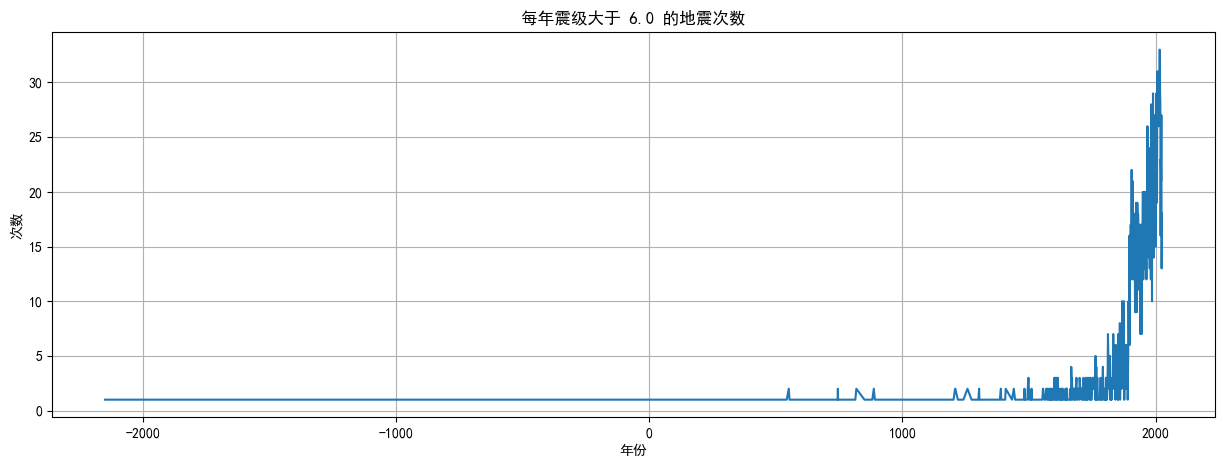

In [5]:
# 1.2
# 从地震数据表中筛选出震级大于 6.0 的地震记录
eqs_above_6 = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]
# 按年份统计震级大于 6.0 的地震次数
eqs_per_year = eqs_above_6.groupby('Year').size()
# 创建一个图形，设置大小为 15x5 英寸
plt.figure(figsize=(15, 5))
# 绘制每年震级大于 6.0 的地震次数的折线图
eqs_per_year.plot()
# 设置图表标题
plt.title("每年震级大于 6.0 的地震次数")
# 设置横轴标签为“年份”
plt.xlabel("年份")
# 设置纵轴标签为“次数”
plt.ylabel("次数")
# 添加网格线
plt.grid(True)
# 显示图表
plt.show()

In [6]:
# 1.3
def CountEq_LargestEq(df, country):
    # 从数据集中筛选出指定国家的所有地震记录
    subset = df[df['Country'] == country].copy()
    # 统计该国的地震总数
    total_eqs = len(subset)
    # 如果该国没有有效的震级数据（Mag 列全是缺失值）
    if subset['Mag'].notna().sum() == 0:
    # 没有有效震级
        return {
            'Country': country,              # 国家名
            'Total_Earthquakes': total_eqs,  # 地震总数
            'Year_Largest_Eq': None,         # 最大地震年份为空
            'Magnitude_Largest_Eq': None     # 最大地震震级为空
        }
    # 找到该国震级最大的那一行记录
    largest_eq = subset.loc[subset['Mag'].idxmax()]
    # 返回结果字典，包括国家名、地震总数、最大地震年份和震级
    return {
        'Country': country,
        'Total_Earthquakes': total_eqs,
        'Year_Largest_Eq': int(largest_eq['Year']) if pd.notna(largest_eq['Year']) else None,
        'Magnitude_Largest_Eq': largest_eq['Mag']}
# 遍历数据表中所有的国家名，调用 CountEq_LargestEq 计算结果
results = [CountEq_LargestEq(Sig_Eqs, c) for c in Sig_Eqs['Country'].unique()]
# 将结果列表转换为 DataFrame，并按地震总数降序排列
results_df = pd.DataFrame(results).sort_values(by='Total_Earthquakes', ascending=False)
# 打印前 10 个国家的结果
print(results_df.head(10))
# 单独调用函数，查看某个国家的结果
print(CountEq_LargestEq(Sig_Eqs, "Country"))

        Country  Total_Earthquakes  Year_Largest_Eq  Magnitude_Largest_Eq
15        CHINA                623           1668.0                   8.5
34        JAPAN                424           2011.0                   9.1
73    INDONESIA                421           2004.0                   9.1
8          IRAN                388            856.0                   7.9
10       TURKEY                358           1939.0                   7.8
6         ITALY                333           1915.0                   7.5
4        GREECE                289            365.0                   8.0
56          USA                280           1964.0                   9.2
71  PHILIPPINES                230           1897.0                   8.7
52       MEXICO                214           1787.0                   8.6
{'Country': 'Country', 'Total_Earthquakes': 0, 'Year_Largest_Eq': None, 'Magnitude_Largest_Eq': None}


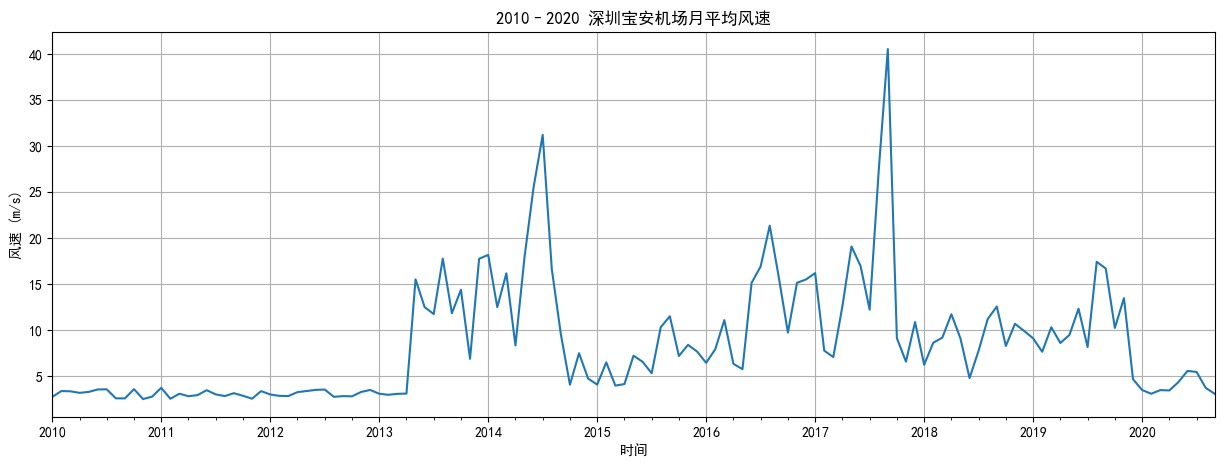

In [8]:
# 2 
# 读取 CSV 文件，low_memory=False 表示分块读取，避免类型推断警告
df = pd.read_csv("2281305.csv", low_memory=False)
# 将日期列转换为 pandas 的日期时间类型，方便后续按年、月筛选和分组
df['DATE'] = pd.to_datetime(df['DATE'])
# 提取风速数据：第 4 个子项表示风速，单位是 0.1 m/s，因此需要除以 10 转换为 m/s
df['WindSpeed'] = pd.to_numeric(df['WND'].str.split(',').str[3])/10
# 按月末分组，计算每个月的平均风速
monthly_avg = df.groupby(pd.Grouper(key='DATE', freq='ME'))['WindSpeed'].mean()
# 创建图形，设置大小为 15x5 英寸
plt.figure(figsize=(15,5))
# 绘制月平均风速的折线图
monthly_avg.plot()
# 设置图表标题
plt.title("2010–2020 深圳宝安机场月平均风速")
# 设置横轴标签为“时间”
plt.xlabel("时间")
# 设置纵轴标签为“风速 (m/s)”
plt.ylabel("风速 (m/s)")
# 添加网格线
plt.grid(True)
# 显示图表
plt.show()

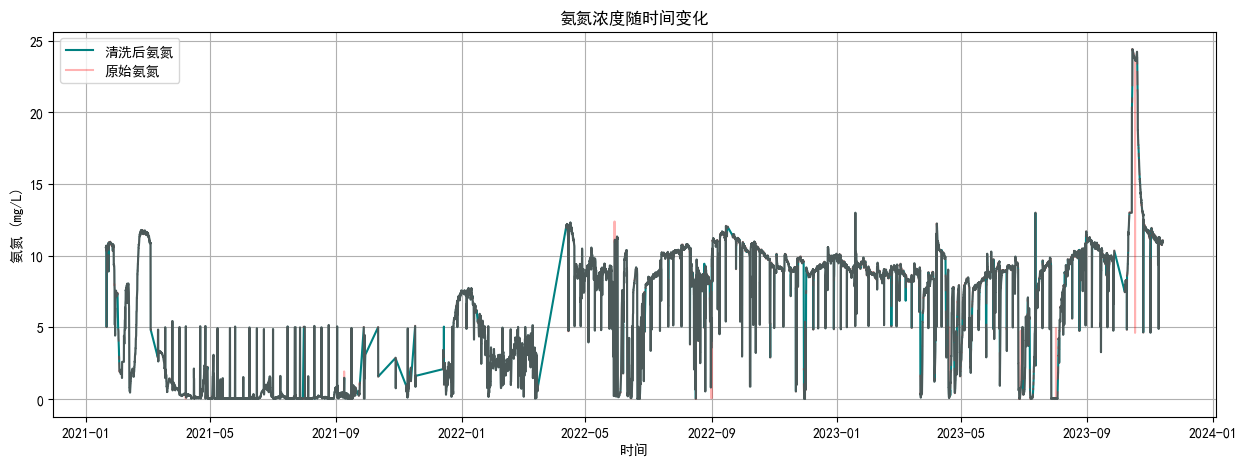


氨氮统计结果（突变值清洗+插值填充后）：
平均值：6.05 mg/L
中位数：7.57 mg/L
标准差：4.30 mg/L
最大值：24.42 mg/L
最小值：0.00 mg/L


In [9]:
# 3.1
# 读取 Excel 数据文件，文件名为 WZ2.xlsx
df = pd.read_excel("WZ2.xlsx")
# 将“监测时间”列转换为 datetime 类型
df['监测时间'] = pd.to_datetime(df['监测时间'])
# 将“氨氮”列转换为数值型，遇到非数值（如空值、异常字符）时强制为 NaN
df['氨氮'] = pd.to_numeric(df['氨氮'], errors='coerce')
# 定义清洗函数：检测突变值并插值填充
def clean_ammonia(series, max_change_rate=0.7, window_size=3):
    # 复制原始序列
    series_safe = series.copy()  
    # 将值为 0 的数据替换为一个极小值
    series_safe[series_safe == 0] = 1e-6  
    # 计算相邻点的百分比变化率，fill_method=None
    changes = series_safe.pct_change(fill_method=None).abs() 
    # 初始化异常值布尔掩码
    outlier_mask = pd.Series(False, index=series.index)
    # 遍历序列，检测突变值
    for i in range(window_size, len(series)):
        if pd.isna(changes.iloc[i]):   # 如果当前变化率为 NaN，跳过
            continue
        # 获取窗口内的变化率（前 window_size 个点）
        window_changes = changes.iloc[i-window_size:i].dropna()
        if len(window_changes) == 0:   # 如果窗口内没有有效数据，跳过
            continue
        current_change = changes.iloc[i]       # 当前点的变化率
        window_median = window_changes.median() # 窗口内变化率的中位数
        # 判断是否为突变值：超过最大变化率且显著高于窗口中位数
        if (current_change > max_change_rate and current_change > 2 * window_median):
            outlier_mask.iloc[i] = True
    # 将突变值标记为 NaN
    cleaned_series = series.copy()
    cleaned_series[outlier_mask] = np.nan
    # 插值填充缺失值，保持时间序列连续性
    cleaned_series = cleaned_series.interpolate(method='linear')
    # 生成清洗报告，包含异常数量和统计信息
    report = {
        'outliers_detected': outlier_mask.sum(),                   # 检测到的异常值数量
        'outlier_percentage': outlier_mask.sum() / len(series) * 100,  # 异常值占比
        'mean': cleaned_series.mean(),                             # 平均值
        'median': cleaned_series.median(),                         # 中位数
        'std': cleaned_series.std(),                               # 标准差
        'max': cleaned_series.max(),                               # 最大值
        'min': cleaned_series.min()}                               # 最小值
    return cleaned_series, report
# 调用清洗函数，对“氨氮”列进行清洗
df['氨氮_cleaned'], report = clean_ammonia(df['氨氮'])

#3.2 绘制时间序列图

# 创建绘图窗口，设置大小为 15x5 英寸
plt.figure(figsize=(15,5))
# 绘制清洗后的氨氮浓度曲线
plt.plot(df['监测时间'], df['氨氮_cleaned'], color='teal', label='清洗后氨氮')
# 绘制原始氨氮浓度曲线
plt.plot(df['监测时间'], df['氨氮'], color='red', alpha=0.3, label='原始氨氮')
# 设置图表标题
plt.title("氨氮浓度随时间变化")
# 设置横轴标签为“时间”
plt.xlabel("时间")
# 设置纵轴标签为“氨氮 (mg/L)”
plt.ylabel("氨氮 (mg/L)")
# 显示图例
plt.legend()
# 添加网格线
plt.grid(True)
# 显示图表
plt.show()

#3.3 统计检验与结果

# 打印统计分析结果
print("\n氨氮统计结果（突变值清洗+插值填充后）：")
print(f"平均值：{report['mean']:.2f} mg/L")   # 输出平均值
print(f"中位数：{report['median']:.2f} mg/L") # 输出中位数
print(f"标准差：{report['std']:.2f} mg/L")    # 输出标准差
print(f"最大值：{report['max']:.2f} mg/L")    # 输出最大值
print(f"最小值：{report['min']:.2f} mg/L")    # 输出最小值